# Set up

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Nhập thư viện

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Đọc dữ liệu
df = pd.read_csv('daily-min-temperatures.csv')
df.sample(10)

,Date,Temp
3518,1990-08-22,6.1
2341,1987-06-01,8.5
471,1982-04-17,9.3
2484,1987-10-22,9.2
1451,1984-12-22,11.4
956,1983-08-15,13.8
1763,1985-10-31,6.8
3552,1990-09-25,16.3
3349,1990-03-06,17.2
1646,1985-07-06,4.7


In [4]:
# Kiểm tra dạng dữ liệu

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [5]:
# Xem tổng quát thống kê
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


#### Nhận xét:

Nhiệt độ trung bình là 11 độ, độ lệch nhiệt độ là 4, nhiệt độ min là 0, nhiệt độ max là 26.

Dữ liệu có vẻ cân (giá trị trung bình và độ lệch chuẩn, nhiệt độ dao động tầm 7 - 15 độ, nó cũng gần với Q1 và Q3 )

In [3]:
df['Temp'].describe()

count    3650.000000
mean       11.177753
std         4.071837
min         0.000000
25%         8.300000
50%        11.000000
75%        14.000000
max        26.300000
Name: Temp, dtype: float64

#### Nhận xét: 
giá trị trung bình và giá trị trung vị gần bằng nhau


# Trực qua hoá dữ liệu

#### Vẽ biểu đồ histogram cho cột Temp

<Axes: >

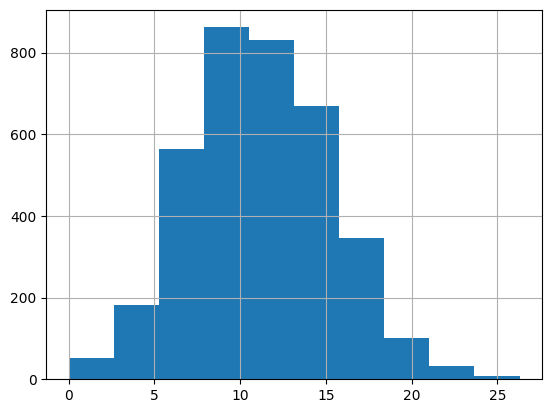

In [9]:
df['Temp'].hist()

(array([ 53., 181., 564., 862., 830., 670., 347., 102.,  32.,   9.]),
 array([ 0.  ,  2.63,  5.26,  7.89, 10.52, 13.15, 15.78, 18.41, 21.04,
        23.67, 26.3 ]),
 <BarContainer object of 10 artists>)

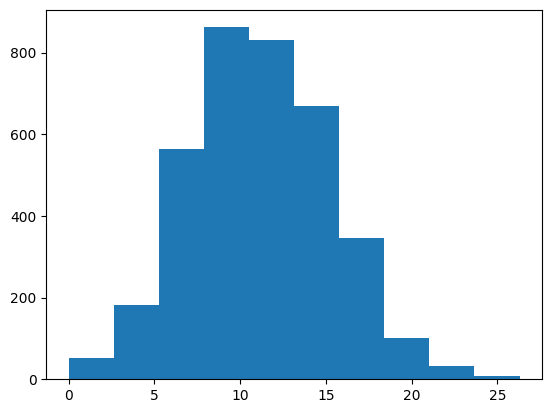

In [10]:
# sử dụng thư viện matplotlib

plt.hist(df['Temp'])

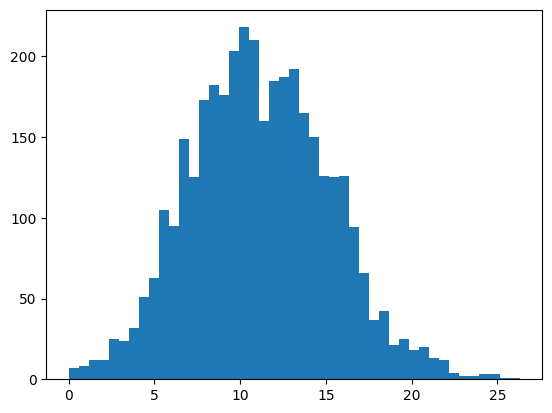

In [4]:
plt.hist(df['Temp'], bins = 45)
plt.show()

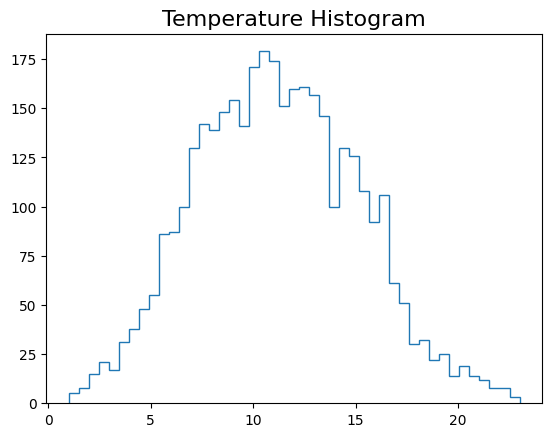

In [6]:
# làm đẹp 

plt.hist(df['Temp'], bins = 45, range = (1, 23), histtype = 'step')
plt.title('Temperature Histogram', fontsize = 16)
plt.show()

##### Nhận xét:

Giá trị xuất hiện nhiều nhất là trong khoảng 10-11 độ.
Có một số giá trị bất thường ở cả 2 phía. Một số rất ít ngày có nhiệt độ cao bất thường trên 23 độ và thấp bất thường dưới 1 độ.
Nhìn chung, nếu loại bỏ các ngày có giá trị bất thường, có thể nói nhiệt độ tuân theo phân phối chuẩn.

#### Vẽ biểu đồ thể hiện xu hướng của nhiệt độ theo thời gian

In [ ]:
# vẽ biểu thị xu hướng theo thời gian --> line plot

#chuẩn bị dữ liệu, cột x cột y
#vẽ

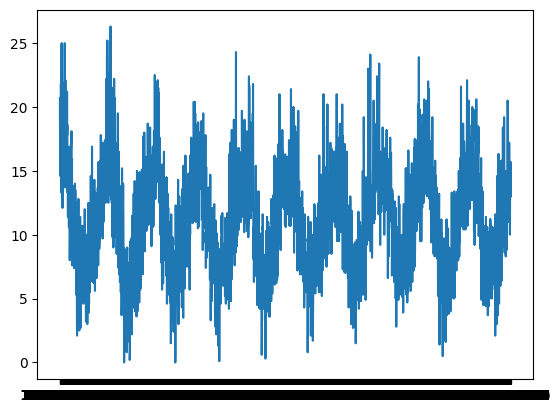

In [7]:
plt.plot(df['Date'], df['Temp'])

#### Nhận xét:

Có thể thay xu hướng thay đổi nhiệt độ có tính chu kỳ.
Dựa vào đồ thị, ta phán đoán chu kì thay đổi của nhiệt độ là theo năm.
Tuy nhiên, do khoảng thời gian biểu diễn dài nên khó có thể nhìn chi tiết xu hướng biến đổi nhiệt độ trong năm. Do đó ta vẽ bổ sung biểu đồ đường thể hiện xu hướng nhiệt độ theo từng năm quan tâm.

#### Vẽ sự thay đổi của nhiệt độ theo thời gian giới hạn thời gian trong khoảng từ 1/1/1990 đến 12/31/1990

In [12]:
df['Date']

0       1981-01-01
1       1981-01-02
2       1981-01-03
3       1981-01-04
4       1981-01-05
           ...    
3645    1990-12-27
3646    1990-12-28
3647    1990-12-29
3648    1990-12-30
3649    1990-12-31
Name: Date, Length: 3650, dtype: object

In [14]:
df['Date'].describe()

count           3650
unique          3650
top       1981-01-01
freq               1
Name: Date, dtype: object

In [15]:
df['Date'].unique()

array(['1981-01-01', '1981-01-02', '1981-01-03', ..., '1990-12-29',
       '1990-12-30', '1990-12-31'], dtype=object)

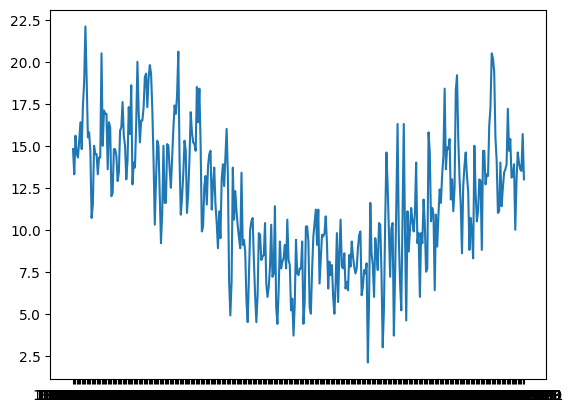

In [18]:
# Vẽ sự thay đổi của nhiệt độ theo thời gian
# giới hạn thời gian trong khoảng từ 1/1/1990 đến 12/31/1990

# chuẩn bị dữ liệu: lọc dữ liệu
df_1990 = df[(df['Date'] >= '1990-01-01') & (df['Date'] <= '1990-12-31')]

# Vẽ
plt.plot(df_1990['Date'], df_1990['Temp'])
plt.show()



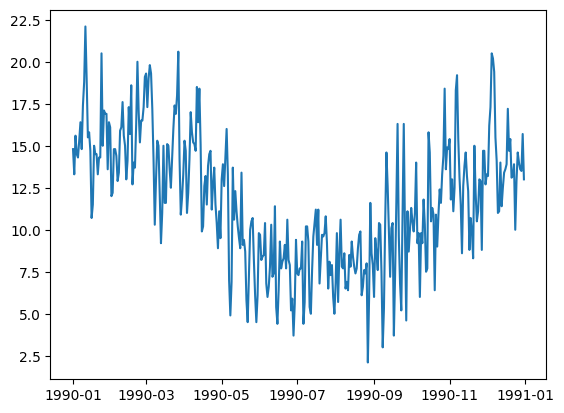

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
bounds = ['1/1/1990', '12/31/1990']
bounds = pd.to_datetime(bounds)
d1 = df[(df['Date'] >= bounds[0]) & (df['Date'] <= bounds[1])]
plt.plot(d1['Date'], d1['Temp'])
plt.show()

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].unique()
# bounds = ['1/1/1990', '12/31/1990']
# bounds = pd.to_datetime(bounds)
# d1 = df[(df['Date'] >= bounds[0]) & (df['Date'] <= bounds[1])]
# plt.plot(d1['Date'], d1['Temp'])
# plt.show()

<DatetimeArray>
['1981-01-01 00:00:00', '1981-01-02 00:00:00', '1981-01-03 00:00:00',
 '1981-01-04 00:00:00', '1981-01-05 00:00:00', '1981-01-06 00:00:00',
 '1981-01-07 00:00:00', '1981-01-08 00:00:00', '1981-01-09 00:00:00',
 '1981-01-10 00:00:00',
 ...
 '1990-12-22 00:00:00', '1990-12-23 00:00:00', '1990-12-24 00:00:00',
 '1990-12-25 00:00:00', '1990-12-26 00:00:00', '1990-12-27 00:00:00',
 '1990-12-28 00:00:00', '1990-12-29 00:00:00', '1990-12-30 00:00:00',
 '1990-12-31 00:00:00']
Length: 3650, dtype: datetime64[ns]

In [24]:
df['Date'] = pd.to_datetime(df['Date'])

# bounds = ['1/1/1990', '12/31/1990']
# bounds = pd.to_datetime(bounds)

d1 = df[(df['Date'] >= '1990-01-01') & (df['Date'] <= '1990-12-31')]
d1
# plt.plot(d1['Date'], d1['Temp'])
# plt.show()

,Date,Temp
3285,1990-01-01,14.8
3286,1990-01-02,13.3
3287,1990-01-03,15.6
3288,1990-01-04,14.5
3289,1990-01-05,14.3
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


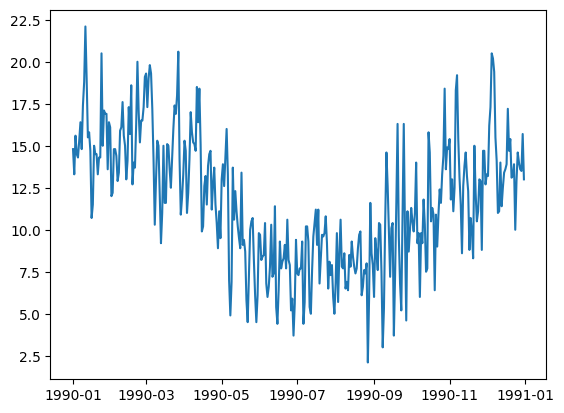

In [25]:
df['Date'] = pd.to_datetime(df['Date'])


d1 = df[(df['Date'] >= '1990-01-01') & (df['Date'] <= '1990-12-31')]

plt.plot(d1['Date'], d1['Temp'])
plt.show()

#### Nhận xét:

Nhiệt độ có xu hướng giảm từ tháng 5 và bắt đầu tăng trở lại vào tháng 9.
3 tháng đầu năm có nhiệt độ trung bình cao nhất.


#### Ở đây cột Date đang ở dang string

Do vậy nên:

Chuyển đổi DL về dạng ngày tháng datetime, sau đó
lọc sau khi chuyển đổi


Mục đích: đảm bảo an toàn

# Dữ liệu Online Retail


In [26]:
# Đọc dữ liệu

df_1= pd.read_csv('OnlineRetail.csv', encoding='unicode_escape')

In [27]:
# Xem 10 dòng ngẫu nhiên
df_1.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
225552,556721,22927,GREEN GIANT GARDEN THERMOMETER,2,6/14/2011 11:23,5.95,15218.0,United Kingdom
16194,537645,22630,DOLLY GIRL LUNCH BOX,2,12/7/2010 15:34,2.51,NaN,United Kingdom
461239,575931,23108,SET OF 10 LED DOLLY LIGHTS,2,11/13/2011 10:35,6.25,16560.0,United Kingdom
379340,569688,23327,HANGING CLEAR MINI BOTTLE,1,10/5/2011 14:55,0.63,15048.0,United Kingdom
115963,546165,22424,ENAMEL BREAD BIN CREAM,1,3/10/2011 10:08,12.75,18183.0,United Kingdom
447424,574950,23331,DECORATIVE WICKER HEART SMALL,6,11/8/2011 9:29,1.25,NaN,United Kingdom
75719,542608,21914,BLUE HARMONICA IN BOX,1,1/30/2011 13:51,1.25,16770.0,United Kingdom
190400,553191,22925,BLUE GIANT GARDEN THERMOMETER,4,5/15/2011 13:22,5.95,13118.0,United Kingdom
181453,552469,21220,SET/4 BADGES DOGS,3,5/9/2011 15:34,1.25,12867.0,United Kingdom
348090,567375,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,6,9/20/2011 9:45,2.95,14766.0,United Kingdom


In [28]:
df_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Yêu cầu:
### Vẽ biểu đồ đường thể hiện xu hướng thay đổi số lượng đơn hàng theo thời gian trong năm 2011

### Vẽ biểu đồ cột so sánh số lượng đơn hàng trong các tháng của năm 2011

##### Vẽ biểu đồ đường thể hiện xu hướng thay đổi số lượng đơn hàng theo thời gian trong năm 2011

In [29]:
# Chuẩn bị dữ liệu
  # Lọc DL: 
   # chỉ bao gồm năm 2011 --> chưa có cột 2011 --> tạo ra cột năm 2011 -> 
   # --> chuyển đổi cột date về dạng ngày tháng -> có đc cột 2011
# --> Lọc

# cần có 2 cột: cột date, cột số lượng đơn hàng theo ngày 
  # -> tạo ra cột số lượng theo ngày --> gom dữ liệu (đếm xem 1 ngày có bao nhiêu đơn hàng)


In [30]:
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [31]:
# tạo cột năm 2011

df_1['InvoiceYear'] = df_1['InvoiceDate'].dt.year
df_1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011


In [32]:
# Chuẩn dị dữ liệu
# Lọc dữ liệu ănm 2011 

df_2 = df_1[df_1['InvoiceYear'] == 2011]
df_2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011


In [38]:
# Đếm số lượng đơn hàng theo ngày
# 1 đơn hàng = InvoiceNo (1 đơn hàng xuất hiện nhiều lần dó có nhiều sản phẩm khác nhau --> bỏ duplicates)

df_3 = df_2[['InvoiceNo', 'InvoiceYear', 'InvoiceDate']].drop_duplicates(keep='first')

# Bỏ giờ ở cột InvoiceDate
# df_3['InvoiceDate'] = df_2['InvoiceDate'].dt.date
df_3

,InvoiceNo,InvoiceYear,InvoiceDate
42481,539993,2011,2011-01-04
42498,539994,2011,2011-01-04
42499,539995,2011,2011-01-04
42500,539996,2011,2011-01-04
42501,539997,2011,2011-01-04
...,...,...,...
541865,581583,2011,2011-12-09
541867,581584,2011,2011-12-09
541869,581585,2011,2011-12-09
541890,581586,2011,2011-12-09


In [46]:
# gom nhóm dữ liệu: đếm xem mỗi ngày có bao nhiêu đơn hàng

df_4 = df_3.groupby('InvoiceDate')['InvoiceNo'].count().reset_index()
df_4

,InvoiceDate,InvoiceNo
0,2011-01-04,57
1,2011-01-05,76
2,2011-01-06,78
3,2011-01-07,58
4,2011-01-09,51
...,...,...
280,2011-12-05,151
281,2011-12-06,149
282,2011-12-07,138
283,2011-12-08,145


In [47]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InvoiceDate  285 non-null    object
 1   InvoiceNo    285 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ KB


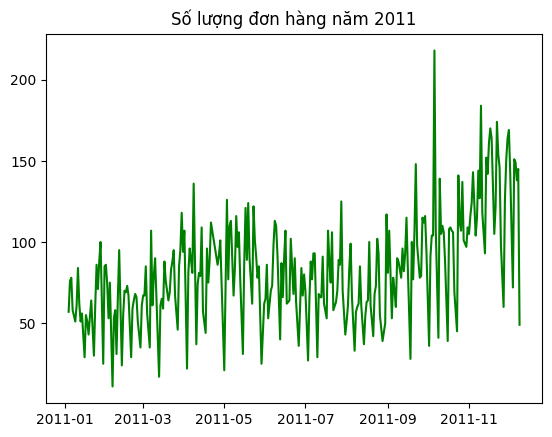

In [48]:
plt.plot(df_4['InvoiceDate'], df_4['InvoiceNo'], color='green')
plt.title('Số lượng đơn hàng năm 2011')
plt.show()

#### Nhận xét:

Số lượng đơn hàng ngày có sự thay đổi mạn
h.
Giữa tháng 10 và 11 có 1 ngày có số đơn tăng đột bi
ến.
Tuy nhiên, biểu đồ này không thể hiện được việc thiếu dữ liệu trong 1 số ngày (do cách nhóm dữ liệu).

In [68]:
df_3

,InvoiceNo,InvoiceYear,InvoiceDate
42481,539993,2011,2011-01-04
42498,539994,2011,2011-01-04
42499,539995,2011,2011-01-04
42500,539996,2011,2011-01-04
42501,539997,2011,2011-01-04
...,...,...,...
541865,581583,2011,2011-12-09
541867,581584,2011,2011-12-09
541869,581585,2011,2011-12-09
541890,581586,2011,2011-12-09


In [69]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23875 entries, 42481 to 541894
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InvoiceNo    23875 non-null  object
 1   InvoiceYear  23875 non-null  int32 
 2   InvoiceDate  23875 non-null  object
dtypes: int32(1), object(2)
memory usage: 652.8+ KB


In [71]:
df_3['InvoiceDate'] = pd.to_datetime(df_3['InvoiceDate'])
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23875 entries, 42481 to 541894
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    23875 non-null  object        
 1   InvoiceYear  23875 non-null  int32         
 2   InvoiceDate  23875 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 652.8+ KB


In [73]:

df_5 = df_3[['InvoiceNo', 'InvoiceYear', 'InvoiceDate']].drop_duplicates(keep='first')

# Bỏ giờ ở cột InvoiceDate
df_5['InvoiceDate'] = df_3['InvoiceDate'].dt.date
df_5

,InvoiceNo,InvoiceYear,InvoiceDate
42481,539993,2011,2011-01-04
42498,539994,2011,2011-01-04
42499,539995,2011,2011-01-04
42500,539996,2011,2011-01-04
42501,539997,2011,2011-01-04
...,...,...,...
541865,581583,2011,2011-12-09
541867,581584,2011,2011-12-09
541869,581585,2011,2011-12-09
541890,581586,2011,2011-12-09


In [74]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23875 entries, 42481 to 541894
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InvoiceNo    23875 non-null  object
 1   InvoiceYear  23875 non-null  int32 
 2   InvoiceDate  23875 non-null  object
dtypes: int32(1), object(2)
memory usage: 652.8+ KB


In [76]:
df5 = df_5.groupby('InvoiceDate')['InvoiceNo'].count().reset_index()
df5

,InvoiceDate,InvoiceNo
0,2011-01-04,57
1,2011-01-05,76
2,2011-01-06,78
3,2011-01-07,58
4,2011-01-09,51
...,...,...
280,2011-12-05,151
281,2011-12-06,149
282,2011-12-07,138
283,2011-12-08,145


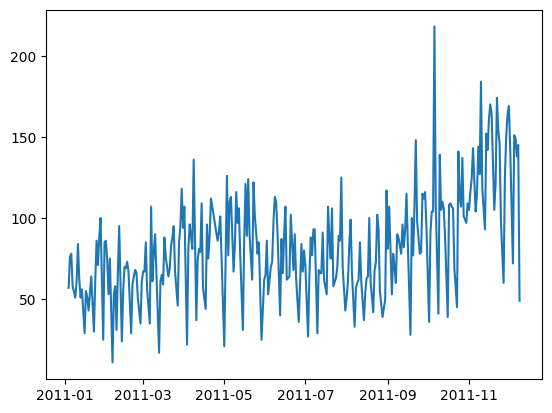

In [77]:
# vẼ BIỂU ĐỒ DỰA TRÊN DF5

df5.columns = ['Date', 'Count']

plt.plot(df5['Date'], df5['Count'])
plt.show()

In [78]:
df5

,Date,Count
0,2011-01-04,57
1,2011-01-05,76
2,2011-01-06,78
3,2011-01-07,58
4,2011-01-09,51
...,...,...
280,2011-12-05,151
281,2011-12-06,149
282,2011-12-07,138
283,2011-12-08,145


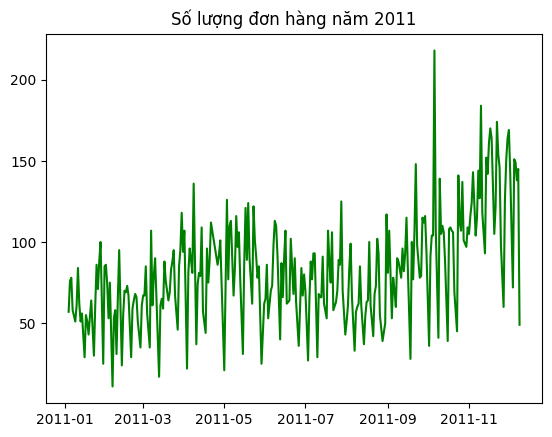

In [56]:
# Vẽ dựa trên bảng df_4

df_4.columns = ['Date', 'Count']
df_4
plt.plot(df_4['Date'], df_4['Count'], color='green')
plt.title('Số lượng đơn hàng năm 2011')
plt.show()

## Vẽ biểu đồ cột so sánh số lượng đơn hàng trong các tháng của năm 2011¶

In [57]:
df_2

,InvoiceNo,InvoiceYear,InvoiceDate
42481,539993,2011,2011-01-04
42498,539994,2011,2011-01-04
42499,539995,2011,2011-01-04
42500,539996,2011,2011-01-04
42501,539997,2011,2011-01-04
...,...,...,...
541865,581583,2011,2011-12-09
541867,581584,2011,2011-12-09
541869,581585,2011,2011-12-09
541890,581586,2011,2011-12-09


In [60]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23875 entries, 42481 to 541894
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InvoiceNo    23875 non-null  object
 1   InvoiceYear  23875 non-null  int32 
 2   InvoiceDate  23875 non-null  object
dtypes: int32(1), object(2)
memory usage: 652.8+ KB


In [62]:
df_2['InvoiceDate'] = pd.to_datetime(df_2['InvoiceDate'])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23875 entries, 42481 to 541894
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    23875 non-null  object        
 1   InvoiceYear  23875 non-null  int32         
 2   InvoiceDate  23875 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 652.8+ KB


In [63]:
# Biểu đồ: bar
# chuẩn bị dữ liệu
 # cột x tháng , cột y số lượng đơn hàng

df_6 = df_2[['InvoiceNo', 'InvoiceYear', 'InvoiceDate']].drop_duplicates(keep='first')
df_6['InvoiceMonth'] = df_2['InvoiceDate'].dt.month

In [65]:
df_7 = df_6.groupby('InvoiceMonth')['InvoiceNo'].count().reset_index()
df_7.columns = ['Month', 'Count']
df_7

,Month,Count
0,1,1476
1,2,1393
2,3,1983
3,4,1744
4,5,2162
5,6,2012
6,7,1927
7,8,1737
8,9,2327
9,10,2637


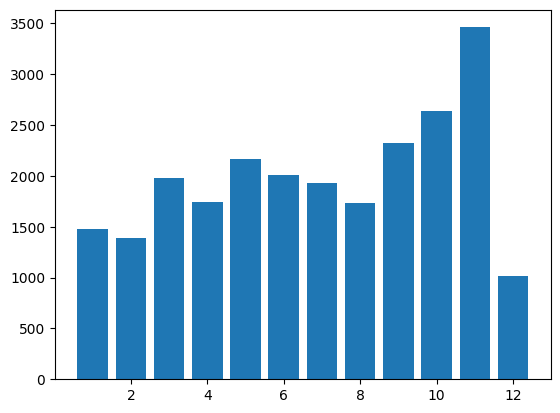

In [66]:
# vẽ

plt.bar(df_7['Month'], df_7['Count'])
plt.show()

#### Nhận xét:

3 tháng 9, 10, 11 có số lượng đơn hàng tăng đáng kể, trong đó tháng 11 có số đơn hàng cao nhất.
Tháng 12 có tổng số lượng đơn hàng thấp nhất.